In [1]:
#!/usr/bin/python
import os, sys

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import cauchy
import numpy as np
from io import StringIO
import re



In [2]:
trainingfile = open('training.dat.txt',"r")

In [3]:
validationfile=open('validation.dat.txt',"r")

In [4]:
def powerlaw(x,a,b,c):
    return a*x**b+c

In [5]:
def f5(x,a,b,c,d,g,h):
    return a*x**5+b*x**4+c*x**3+d*x**2+g*x+h

In [6]:
def f3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

In [7]:
def VowelToConsRatio(name):
    
    words = sum(c.isalpha() for c in name)
    spaces = sum(c.isspace() for c in name)
    others = len(name) - words - spaces
    vowels = sum(map(name.lower().count, "aeiou"))
    consonents = words - vowels


    return float(vowels)/float(consonents), float(spaces)/float(consonents), float(others)/float(consonents)



In [8]:
def AirportNameLetterFrequency(name):
    
    words = sum(c.isalpha() for c in name)
    spaces = sum(c.isspace() for c in name)
    others = len(name) - words - spaces
    vowels = sum(map(name.lower().count, "aeiou"))
    consonents = words - vowels
    #put a one at the end to account for one airport in number totaled. will be normalized later

    return [consonents, vowels, spaces, others, 1]



In [9]:
def MergeCount(totalCount, thisCount):
    totalCount2=totalCount+thisCount
    return totalCount2

#def CounttoHistograms(thisUSAcount, totalUSAcount, totalEnglandcount, totalTurkeycount, totalFrancecount, totalGermanycount, totalMexicocount, totalCanadacount)



In [10]:

def inputdat(filename):
    totalUSAcount=np.zeros(5)
    totalChinacount=np.zeros(5)
    totalEnglandcount=np.zeros(5)
    totalFrancecount=np.zeros(5)
    totalGermanycount=np.zeros(5)
    totalMexicocount=np.zeros(5)
    totalCanadacount=np.zeros(5)



    #I picked some countries I have familiarity with so I know whether or not the data makes sense when I see it, sort of.

    #what I want is the histogram of counts within each country to compare distributions between countries by eye. I can then look at a regression within the US by longitude and lattitude (actual distance from Chicago?) if it looks interesting

    ratio=[]
    coords=[]


    for line in filename:
        line=re.split(',',line);

        if line[3] == "\"China\"":
            thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
            ratio.append([thisratioV,thisratioS,thisratioO])
            coords.append([float(line[6]),float(line[7])])
        if line[3] == "\"United States\"":
            thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
            ratio.append([thisratioV,thisratioS,thisratioO])
            coords.append([float(line[6]),float(line[7])])
        if line[3] == "\"United Kingdom\"":
            thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
            ratio.append([thisratioV,thisratioS,thisratioO])
            coords.append([float(line[6]),float(line[7])])
        if line[3] == "\"France\"":
            thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
            ratio.append([thisratioV,thisratioS,thisratioO])
            coords.append([float(line[6]),float(line[7])])
    
        if line[3] == "\"Germany\"":#
            thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
            ratio.append([thisratioV,thisratioS,thisratioO])
            coords.append([float(line[6]),float(line[7])])
        if line[3] == "\"Mexico\"" :
            thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
            ratio.append([thisratioV,thisratioS,thisratioO])
            coords.append([float(line[6]),float(line[7])])
        if line[3] == "\"Canada\"" :
            thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
            ratio.append([thisratioV,thisratioS,thisratioO])
            coords.append([float(line[6]),float(line[7])])

    ratioarray=np.asarray(ratio)
    coordsarray=np.asarray(coords)
    return ratioarray,coordsarray

In [11]:
ratioarraytraining,coordsarraytraining=inputdat(trainingfile)

In [12]:
ratioarrayvalidation,coordsarrayvalidation=inputdat(validationfile)

In [13]:
print(ratioarraytraining)


[[0.81818182 0.27272727 0.18181818]
 [0.5        0.25       0.25      ]
 [0.55555556 0.22222222 0.16666667]
 ...
 [0.5        0.1        0.2       ]
 [0.72727273 0.18181818 0.18181818]
 [0.5        0.14285714 0.14285714]]


In [14]:

print(coordsarraytraining)

[[ 46.48500061 -84.50939941]
 [ 50.0564003  -97.03250122]
 [ 44.63970184 -63.49940109]
 ...
 [ 42.9117012   90.24749756]
 [ 40.542524   122.3586    ]
 [ 41.78440094 123.4960022 ]]


In [15]:
scaler = StandardScaler()
trainingdat=scaler.fit_transform(ratioarraytraining)
#StandardScaler(copy=True, with_mean=True, with_std=True)

#trainingdat=scaler.transform(ratioarray)




In [16]:
validationdat=scaler.transform(ratioarrayvalidation)

In [17]:
print(trainingdat)

[[ 0.9186512   1.86058902 -0.10200686]
 [-1.3119613   1.47526403  0.75408923]
 [-0.92248928  1.00431127 -0.29225043]
 ...
 [-1.3119613  -1.06788089  0.12628543]
 [ 0.28133334  0.31928907 -0.10200686]
 [-1.3119613  -0.34126805 -0.59120462]]


In [18]:
print(validationdat)

[[ 0.9186512   1.86058902 -0.10200686]
 [-1.3119613   1.47526403  0.75408923]
 [-0.92248928  1.00431127 -0.29225043]
 ...
 [-0.28100594  0.22862437 -0.90774435]
 [-1.04232682 -1.45913395 -0.45322576]
 [-0.14354523 -2.76331084  5.98578753]]


In [19]:
from sklearn.preprocessing import Normalizer
normalize=Normalizer()
normcoordstraining=normalize.fit_transform(coordsarraytraining)
normcoordsvalidation=normalize.transform(coordsarrayvalidation)

In [20]:
print(normcoordstraining)

[[ 0.4819572  -0.87619476]
 [ 0.45846289 -0.88871355]
 [ 0.57510507 -0.81807956]
 ...
 [ 0.42941717  0.90310625]
 [ 0.31452588  0.9492489 ]
 [ 0.32049813  0.94724915]]


In [21]:
print(normcoordsvalidation)

[[ 0.4819572  -0.87619476]
 [ 0.45846289 -0.88871355]
 [ 0.57510507 -0.81807956]
 ...
 [ 0.36807466 -0.92979624]
 [ 0.99143483  0.13060239]
 [ 0.29492868 -0.95551927]]


In [22]:
from sklearn.linear_model import LinearRegression
regress=LinearRegression()
regress.fit(ratioarraytraining,coordsarraytraining)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
predcoords=regress.predict(ratioarrayvalidation)

In [24]:
from matplotlib import pyplot as plt


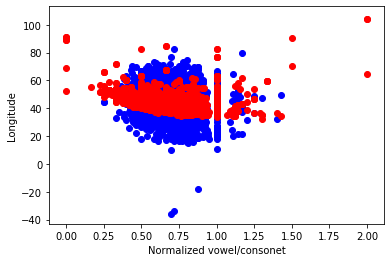

In [25]:
plt.scatter(ratioarraytraining[:,0],coordsarraytraining[:,0],color='blue')
plt.scatter(ratioarrayvalidation[:,0],predcoords[:,0], color='red')
plt.ylabel('Longitude')
plt.xlabel('Normalized vowel/consonet')
plt.show()

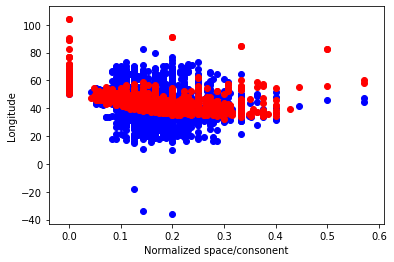

In [26]:
plt.scatter(ratioarraytraining[:,1],coordsarraytraining[:,0],color='blue')
plt.scatter(ratioarrayvalidation[:,1],predcoords[:,0], color='red')
plt.ylabel('Longitude')
plt.xlabel('Normalized space/consonent')
plt.show()

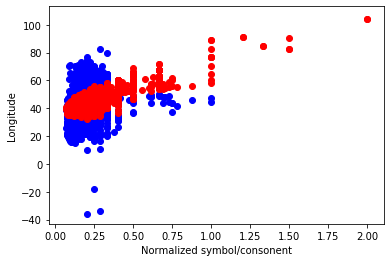

In [27]:
plt.scatter(ratioarraytraining[:,2],coordsarraytraining[:,0],color='blue')
plt.scatter(ratioarrayvalidation[:,2],predcoords[:,0], color='red')
plt.ylabel('Longitude')
plt.xlabel('Normalized symbol/consonent')
plt.show()

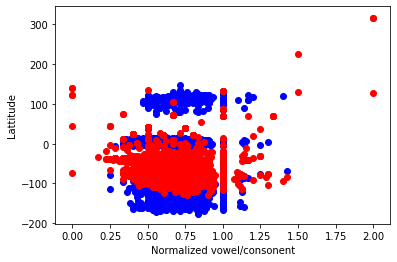

In [28]:
plt.scatter(ratioarraytraining[:,0],coordsarraytraining[:,1],color='blue')
plt.scatter(ratioarrayvalidation[:,0],predcoords[:,1], color='red')
plt.ylabel('Lattitude')
plt.xlabel('Normalized vowel/consonent')
plt.show()

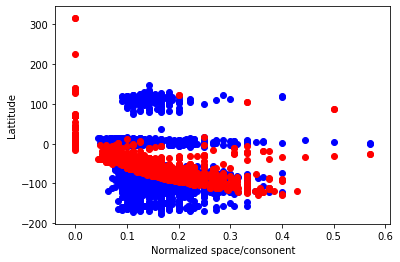

In [29]:
plt.scatter(ratioarraytraining[:,1],coordsarraytraining[:,1],color='blue')
plt.scatter(ratioarrayvalidation[:,1],predcoords[:,1], color='red')
plt.ylabel('Lattitude')
plt.xlabel('Normalized space/consonent')
plt.show()

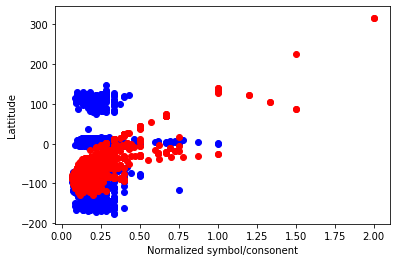

In [30]:
plt.scatter(ratioarraytraining[:,2],coordsarraytraining[:,1],color='blue')
plt.scatter(ratioarrayvalidation[:,2],predcoords[:,1], color='red')
plt.ylabel('Lattitude')
plt.xlabel('Normalized symbol/consonent')
plt.show()

These are scatter plots. This method isn't working. Either there's a flaw in the technique, fundamentally, because the v/c, space/v and cymbol/c are only pdfs not one to one correlations, or there's a flaw in my processing of the data. I could try a neural network because perhaps the relationship is not one to one (three to two) or linear (demonstrated not to be linear). 